In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorflow.python.keras import optimizers
from termcolor import colored

plt.style.use('seaborn')
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15

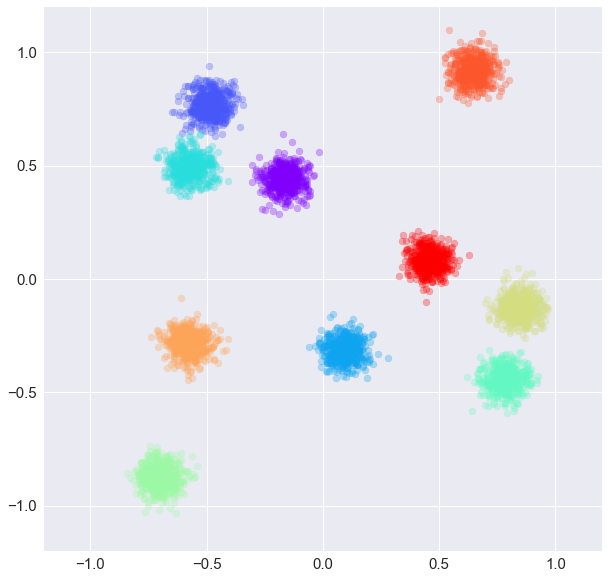

In [2]:
# dataset generation
np.random.seed(1)
n_class, n_data = 10, 500 # class가 10개, 각 class 당 data의 수는 500
noise = 0.05

x_data = np.empty(shape=(0, 2))
y_data = np.empty(shape=(0, 1))

cmap = cm.get_cmap('rainbow', lut=n_class)
fig, ax = plt.subplots(figsize=(10, 10))
for class_idx in range(n_class):
  center = np.random.uniform(-1, 1, (2, ))
  
  x1_data = center[0] + noise * np.random.normal(0, 1, (n_data, 1))
  x2_data = center[1] + noise * np.random.normal(0, 1, (n_data, 1))
  
  class_x_data = np.hstack((x1_data, x2_data))
  class_y_data = class_idx * np.ones((n_data, 1))
  
  x_data = np.vstack((x_data, class_x_data)).astype(np.float32)
  y_data = np.vstack((y_data, class_y_data)).astype(np.int32)
  
  ax.scatter(x1_data, x2_data, color=cmap(class_idx), alpha=0.3)

ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
plt.show()

In [3]:
import tensorflow as tf

train_ds = tf.data.Dataset.from_tensor_slices((x_data, y_data))
train_ds = train_ds.shuffle(1000).batch(16)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# model 1
model1 = Sequential()
model1.add(Dense(units=n_class))
model1.add(Activation('softmax'))

In [5]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Mean, SparseCategoricalAccuracy

loss_object = SparseCategoricalCrossentropy()
optimizer = Adam(learning_rate=0.01)

train_loss = Mean()
train_acc = SparseCategoricalAccuracy()

In [6]:
# @tf.function
def trainer(model):
  global train_ds, loss_object, optimizer
  global train_loss, train_acc
  
  for inputs, labels in train_ds:
    with tf.GradientTape() as tape:
      predictions = model(inputs)
      loss = loss_object(labels, predictions)
      
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    train_loss(loss)
    train_acc(labels, predictions)

def training_repoter():
  global epoch
  global train_loss, train_acc
  
  print(colored('Epoch', 'red', 'on_white'), epoch + 1)
  
  template = 'Train Loss: {:.4f}\t Train Accuraty: {:.2f}%\n'
  print(template.format(train_loss.result(), train_acc.result() * 100))
  
  train_loss.reset_states()
  train_acc.reset_states()



EPOCHS = 20
for epoch in range(EPOCHS):
  trainer(model1)
  training_repoter()

Epoch 1
Train Loss: 1.6449	 Train Accuraty: 44.82%

Epoch 2
Train Loss: 1.2573	 Train Accuraty: 56.06%

Epoch 3
Train Loss: 1.0509	 Train Accuraty: 63.64%

Epoch 4
Train Loss: 0.9147	 Train Accuraty: 70.98%

Epoch 5
Train Loss: 0.8137	 Train Accuraty: 77.54%

Epoch 6
Train Loss: 0.7261	 Train Accuraty: 82.62%

Epoch 7
Train Loss: 0.6624	 Train Accuraty: 86.50%

Epoch 8
Train Loss: 0.6006	 Train Accuraty: 88.54%

Epoch 9
Train Loss: 0.5462	 Train Accuraty: 91.46%

Epoch 10
Train Loss: 0.5014	 Train Accuraty: 92.74%

Epoch 11
Train Loss: 0.4637	 Train Accuraty: 93.84%

Epoch 12
Train Loss: 0.4250	 Train Accuraty: 94.74%

Epoch 13
Train Loss: 0.3909	 Train Accuraty: 95.78%

Epoch 14
Train Loss: 0.3634	 Train Accuraty: 96.90%

Epoch 15
Train Loss: 0.3392	 Train Accuraty: 97.22%

Epoch 16
Train Loss: 0.3143	 Train Accuraty: 97.70%

Epoch 17
Train Loss: 0.2930	 Train Accuraty: 98.38%

Epoch 18
Train Loss: 0.2707	 Train Accuraty: 98.90%

Epoch 19
Train Loss: 0.2534	 Train Accuraty: 98.50%

Ep

In [7]:
x1_test = np.linspace(-1.2, 1.2, 100).astype(np.float32)
x2_test = np.linspace(-1.2, 1.2, 100).astype(np.float32)

X1, X2 = np.meshgrid(x1_test, x2_test)
print(X1.shape, X2.shape)

(100, 100) (100, 100)


In [8]:
x1_test, x2_test = X1.flatten(), X2.flatten()
print(x1_test.shape, x2_test.shape)

(10000,) (10000,)


In [9]:
x_test = np.hstack((x1_test.reshape(-1, 1), x2_test.reshape(-1, 1)))
print(x_test.shape)

(10000, 2)


In [10]:
y_test = model1(x_test).numpy()
print(y_test[:10])

[[3.62514326e-13 7.71055018e-17 5.30229954e-06 1.07273060e-07
  1.01712727e-08 9.89273250e-01 5.52755570e-17 1.07212570e-02
  5.64539876e-25 2.14357993e-15]
 [4.30959169e-13 8.14760330e-17 6.25529401e-06 9.97685490e-08
  1.46665995e-08 9.89979744e-01 8.62958225e-17 1.00139044e-02
  8.41987433e-25 2.95568018e-15]
 [5.12303470e-13 8.60905626e-17 7.37922301e-06 9.27848234e-08
  2.11476952e-08 9.90639806e-01 1.34717546e-16 9.35279392e-03
  1.25572466e-24 4.07523729e-15]
 [6.08973592e-13 9.09624050e-17 8.70469285e-06 8.62859508e-08
  3.04913996e-08 9.91256356e-01 2.10300837e-16 8.73494335e-03
  1.87268124e-24 5.61863551e-15]
 [7.23854950e-13 9.61059464e-17 1.02678387e-05 8.02391042e-08
  4.39616201e-08 9.91832078e-01 3.28275216e-16 8.15758388e-03
  2.79265320e-24 7.74623573e-15]
 [8.60375031e-13 1.01536003e-16 1.21112180e-05 7.46131263e-08
  6.33801278e-08 9.92369652e-01 5.12410940e-16 7.61807710e-03
  4.16439317e-24 1.06790365e-14]
 [1.02260594e-12 1.07269404e-16 1.42849931e-05 6.93789630e

In [11]:
predictions = np.argmax(y_test, axis=1)
print(predictions[:10])

[5 5 5 5 5 5 5 5 5 5]


In [12]:
cdict= {i:cmap(i) for i in range(n_class)}
print(cdict)

{0: (0.5, 0.0, 1.0, 1.0), 1: (0.2777777777777778, 0.3420201433256687, 0.984807753012208, 1.0), 2: (0.05555555555555558, 0.6427876096865393, 0.9396926207859084, 1.0), 3: (0.16666666666666663, 0.8660254037844386, 0.8660254037844387, 1.0), 4: (0.38888888888888884, 0.984807753012208, 0.766044443118978, 1.0), 5: (0.6111111111111112, 0.984807753012208, 0.6427876096865394, 1.0), 6: (0.8333333333333333, 0.8660254037844387, 0.5000000000000001, 1.0), 7: (1.0, 0.6427876096865395, 0.3420201433256688, 1.0), 8: (1.0, 0.3420201433256689, 0.17364817766693041, 1.0), 9: (1.0, 1.2246467991473532e-16, 6.123233995736766e-17, 1.0)}


In [13]:
color_arr = [cdict[pred] for pred in predictions]
print(len(color_arr))
print(color_arr[0])

10000
(0.6111111111111112, 0.984807753012208, 0.6427876096865394, 1.0)


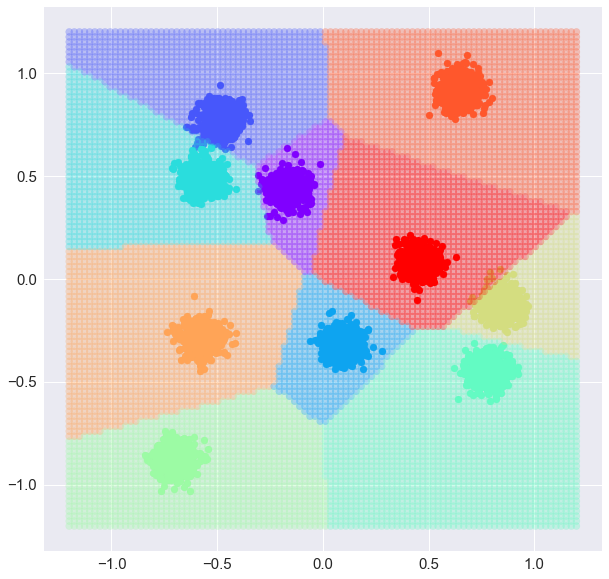

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
for class_idx in range(n_class):
  ax.scatter(
            x_data[class_idx * n_data : (class_idx + 1) * n_data, 0],
            x_data[class_idx * n_data : (class_idx + 1) * n_data, 1],
            color=cmap(class_idx))

ax.scatter(x1_test, x2_test, c=color_arr, alpha=0.3)
plt.show()

In [15]:
# model 2
model2 = Sequential()
model2.add(Dense(units=64))
model2.add(Activation('relu'))
model2.add(Dense(units=n_class))
model2.add(Activation('softmax'))

In [16]:
for epoch in range(EPOCHS):
  trainer(model2)
  training_repoter()

Epoch 1
Train Loss: 0.5271	 Train Accuraty: 89.52%

Epoch 2
Train Loss: 0.0618	 Train Accuraty: 98.80%

Epoch 3
Train Loss: 0.0155	 Train Accuraty: 99.84%

Epoch 4
Train Loss: 0.0089	 Train Accuraty: 99.96%

Epoch 5
Train Loss: 0.0069	 Train Accuraty: 99.90%

Epoch 6
Train Loss: 0.0045	 Train Accuraty: 99.94%

Epoch 7
Train Loss: 0.0050	 Train Accuraty: 99.96%

Epoch 8
Train Loss: 0.0053	 Train Accuraty: 99.90%

Epoch 9
Train Loss: 0.0029	 Train Accuraty: 99.98%

Epoch 10
Train Loss: 0.0045	 Train Accuraty: 99.86%

Epoch 11
Train Loss: 0.0034	 Train Accuraty: 99.90%

Epoch 12
Train Loss: 0.0041	 Train Accuraty: 99.86%

Epoch 13
Train Loss: 0.0027	 Train Accuraty: 99.92%

Epoch 14
Train Loss: 0.0034	 Train Accuraty: 99.90%

Epoch 15
Train Loss: 0.0034	 Train Accuraty: 99.92%

Epoch 16
Train Loss: 0.0039	 Train Accuraty: 99.90%

Epoch 17
Train Loss: 0.0019	 Train Accuraty: 99.94%

Epoch 18
Train Loss: 0.0022	 Train Accuraty: 99.92%

Epoch 19
Train Loss: 0.0031	 Train Accuraty: 99.92%

Ep

In [17]:
x1_test = np.linspace(-1.2, 1.2, 100).astype(np.float32)
x2_test = np.linspace(-1.2, 1.2, 100).astype(np.float32)

X1, X2 = np.meshgrid(x1_test, x2_test)

In [18]:
x1_test, x2_test = X1.flatten(), X2.flatten()
x_test = np.hstack((x1_test.reshape(-1, 1), x2_test.reshape(-1, 1)))
y_test = model2(x_test).numpy()

In [19]:
predictions = np.argmax(y_test, axis=1)
cdict= {i:cmap(i) for i in range(n_class)}
color_arr = [cdict[pred] for pred in predictions]

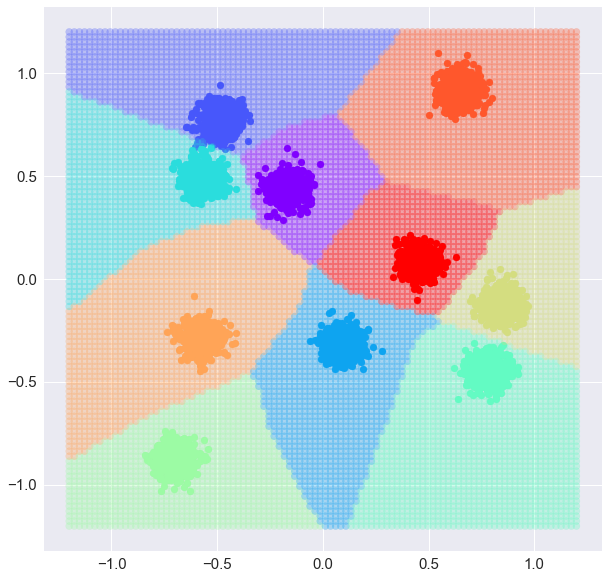

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
for class_idx in range(n_class):
  ax.scatter(
            x_data[class_idx * n_data : (class_idx + 1) * n_data, 0],
            x_data[class_idx * n_data : (class_idx + 1) * n_data, 1],
            color=cmap(class_idx))

ax.scatter(x1_test, x2_test, c=color_arr, alpha=0.3)
plt.show()

확실히 모델이 복잡할수록 decision boundary가 더 곡선의 형태로 만들어지며, 더 복잡한 함수를 만들어 내는 것을 확인할 수 있다. 이 점이 바로 overfitting을 만들어 내는 문제가 될 수 있다.